##  3D linear systems

Noise: 0.0001


/home/zesus/anaconda3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Optimized parameters: a=-0.1000, b=-2.0001, c=1.9999, d=-0.1000, e=-0.3000
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0000
RMSE: 0.0001
Noise: 0.001
Optimized parameters: a=-0.0997, b=-2.0004, c=1.9996, d=-0.1004, e=-0.2999
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0000
RMSE: 0.0010
Noise: 0.01
Optimized parameters: a=-0.1439, b=-2.0052, c=2.0189, d=-0.1613, e=-0.3136
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0102
RMSE: 0.1010
Noise: 0.1
Optimized parameters: a=-0.1459, b=-1.9777, c=1.9966, d=-0.1614, e=-0.3076
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0212
RMSE: 0.1457


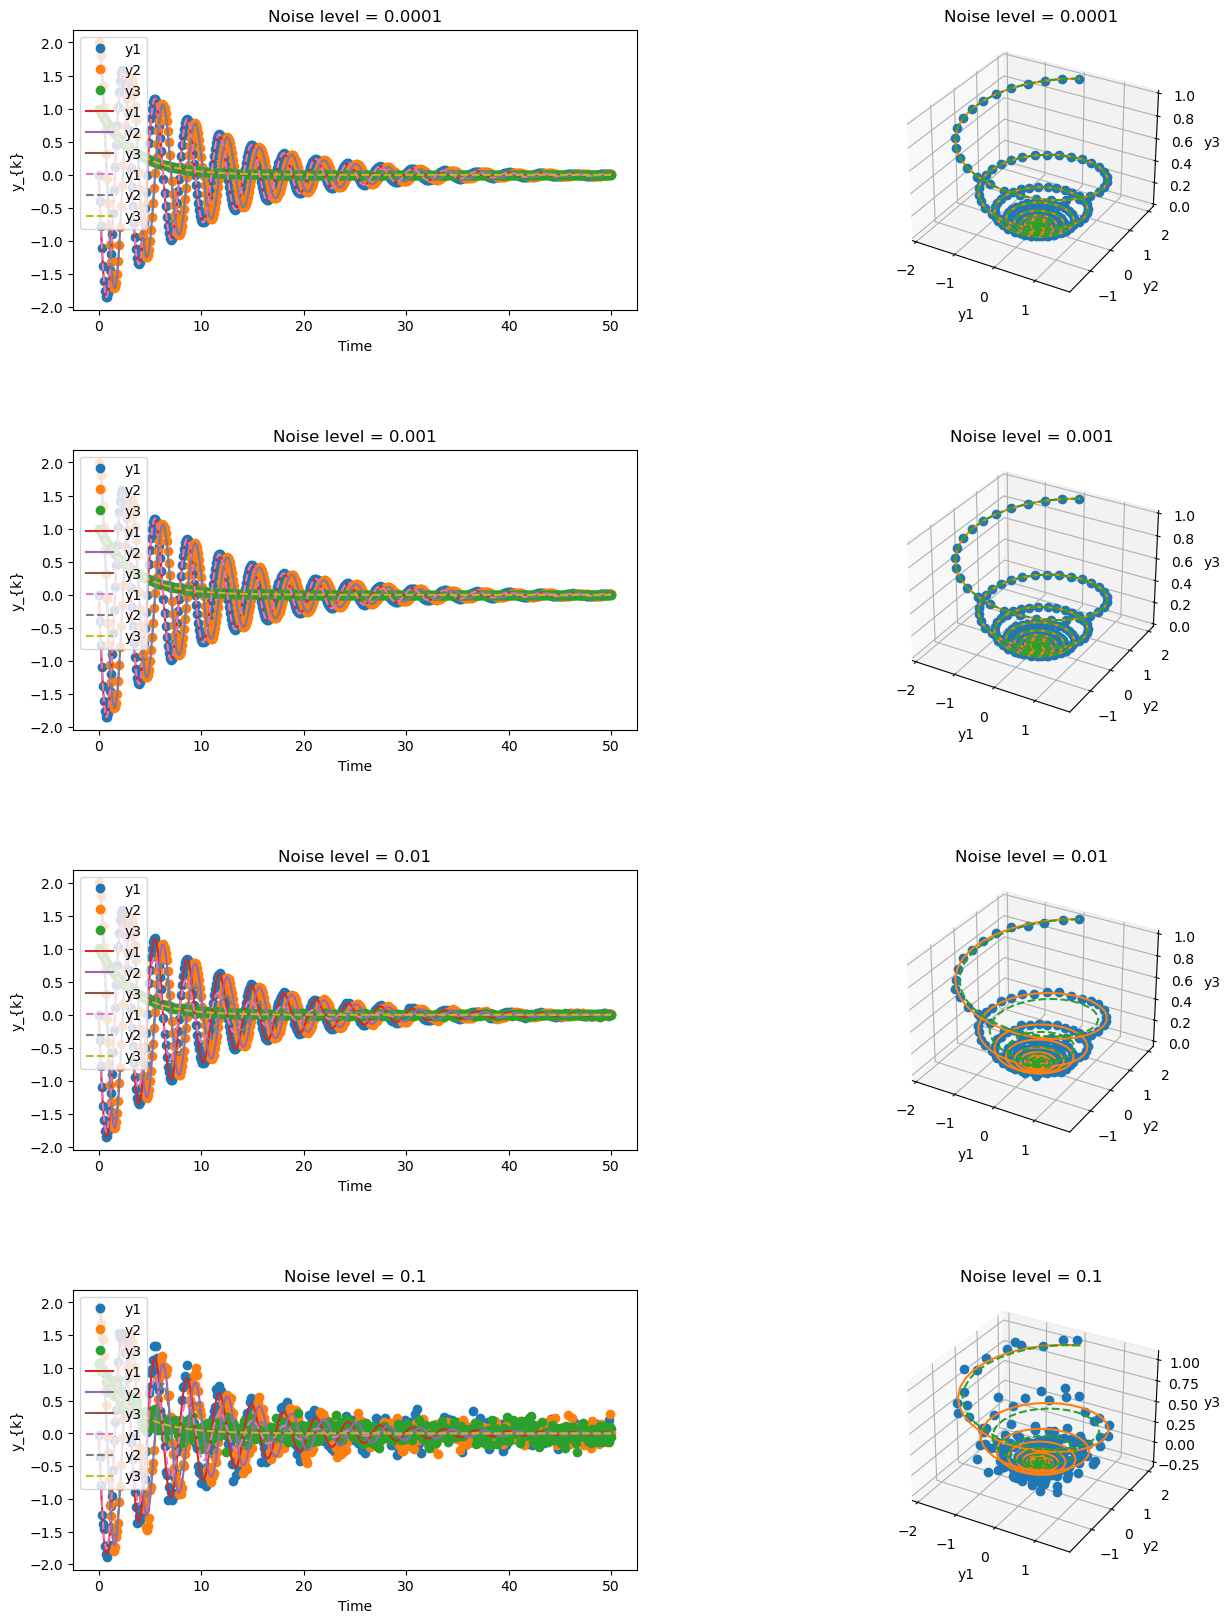

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt


# Define the function
def f(t, y, a, b, c, d, e):
    y1, y2, y3 = y
    return np.array([a * y1 + b * y2, c * y1 + d * y2, e * y3])


# Define the objective function
def objective(x, t, y_data):
    y0 = [0.0, 2.0, 1.0]  # initial conditions
    sol = solve_ivp(lambda t, y: f(t, y, x[0], x[1], x[2], x[3], x[4]), [t[0], t[-1]], y0, t_eval=t)
    y_pred = sol.y
    return np.sum((y_data - y_pred) ** 2)


# Define parameters
a = -0.1
b = -2.0
c = 2.0
d = -0.1
e = -0.3

t0 = 0.0
tmax = 50.0
y0 = np.array([0, 2, 1])

# Generate noisy data for different noise levels
t = np.linspace(t0, tmax, 500)

fig = plt.figure(figsize=(16, 20))
gs = fig.add_gridspec(nrows=4, ncols=2, height_ratios=[1, 1, 1, 1], hspace=0.5)

noises = [0.0001, 0.001, 0.01, 0.1]
for i, noise in enumerate(noises):
    print(f"Noise: {noise}")
    y_true = solve_ivp(lambda t, y: f(t, y, a, b, c, d, e), [t0, tmax], y0, t_eval=t).y
    y_data = y_true + noise * np.random.randn(*y_true.shape)

    # Estimate the parameters using the trust region method
    x0 = [-0.075, -1.85, 1.85, -0.088, -0.285]  # initial guess for a, b, c, d, e
    res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr',
                   bounds=[(-1, None), (-10, None), (-10, None), (-1, None), (-1, None)])
    a_opt, b_opt, c_opt, d_opt, e_opt = res.x
    print(f"Optimized parameters: a={a_opt:.4f}, b={b_opt:.4f}, c={c_opt:.4f}, d={d_opt:.4f}, e={e_opt:.4f}")
    print(f"True parameters: a={a:.4f}, b={b:.4f}, c={c:.4f}, d={d:.4f}, e={e:.4f}")

    # Solve the differential equation using the optimized parameters
    y0 = np.array([0.0, 2.0, 1.0])  # initial conditions
    sol = solve_ivp(lambda t, y: f(t, y, a_opt, b_opt, c_opt, d_opt, e_opt), [t0, tmax], y0, t_eval=t)

    # Compute the MSE and RMSE
    # Compute the MSE and RMSE
    mse = np.mean((y_data - sol.y)**2)
    rmse = np.sqrt(mse)
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")

    # Plot the trajectory in one column
    ax1 = fig.add_subplot(gs[i, 0])
    ax1.plot(sol.t, y_data[0], 'o', label='y1')
    ax1.plot(sol.t, y_data[1], 'o', label='y2')
    ax1.plot(sol.t, y_data[2], 'o', label='y3')
    ax1.plot(sol.t, y_true[0], '-', label='y1')
    ax1.plot(sol.t, y_true[1], '-', label='y2')
    ax1.plot(sol.t, y_true[2], '-', label='y3')
    ax1.plot(sol.t, sol.y[0], '--', label='y1')
    ax1.plot(sol.t, sol.y[1], '--', label='y2')
    ax1.plot(sol.t, sol.y[2], '--', label='y3')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('y_{k}')
    ax1.set_title(f"Noise level = {noise}")
    ax1.legend()

    # Plot the 3D trajectory in the other column
    ax2 = fig.add_subplot(gs[i, 1], projection='3d')
    ax2.plot3D(y_data[0], y_data[1], y_data[2], 'o', label='Data')
    ax2.plot3D(y_true[0], y_true[1], y_true[2], '-', label='True')
    ax2.plot3D(sol.y[0], sol.y[1], sol.y[2],'--', label='Estimated')
    ax2.set_xlabel('y1')
    ax2.set_ylabel('y2')
    ax2.set_zlabel('y3')
    ax2.set_title(f"Noise level = {noise}")

## Effect of Gaussian noise under 10 iterations

Iteration: 1
Noise: 0.0001
Optimized parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0000
RMSE: 0.0001
Noise: 0.001
Optimized parameters: a=-0.1437, b=-1.9737, c=1.9915, d=-0.1607, e=-0.3144
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0105
RMSE: 0.1024
Noise: 0.01
Optimized parameters: a=-0.0994, b=-2.0027, c=1.9975, d=-0.1005, e=-0.3016
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0001
RMSE: 0.0099
Noise: 0.1
Optimized parameters: a=-0.1407, b=-1.9696, c=1.9847, d=-0.1560, e=-0.3175
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0197
RMSE: 0.1402
Iteration: 2
Noise: 0.0001
Optimized parameters: a=-0.1437, b=-1.9737, c=1.9915, d=-0.1607, e=-0.3144
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0105
RMSE: 0.1024
Noise: 0.001
Optimized parameters: a=-0.1437, b=-1.9737, c=1

/tmp/ipykernel_141744/3363479282.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


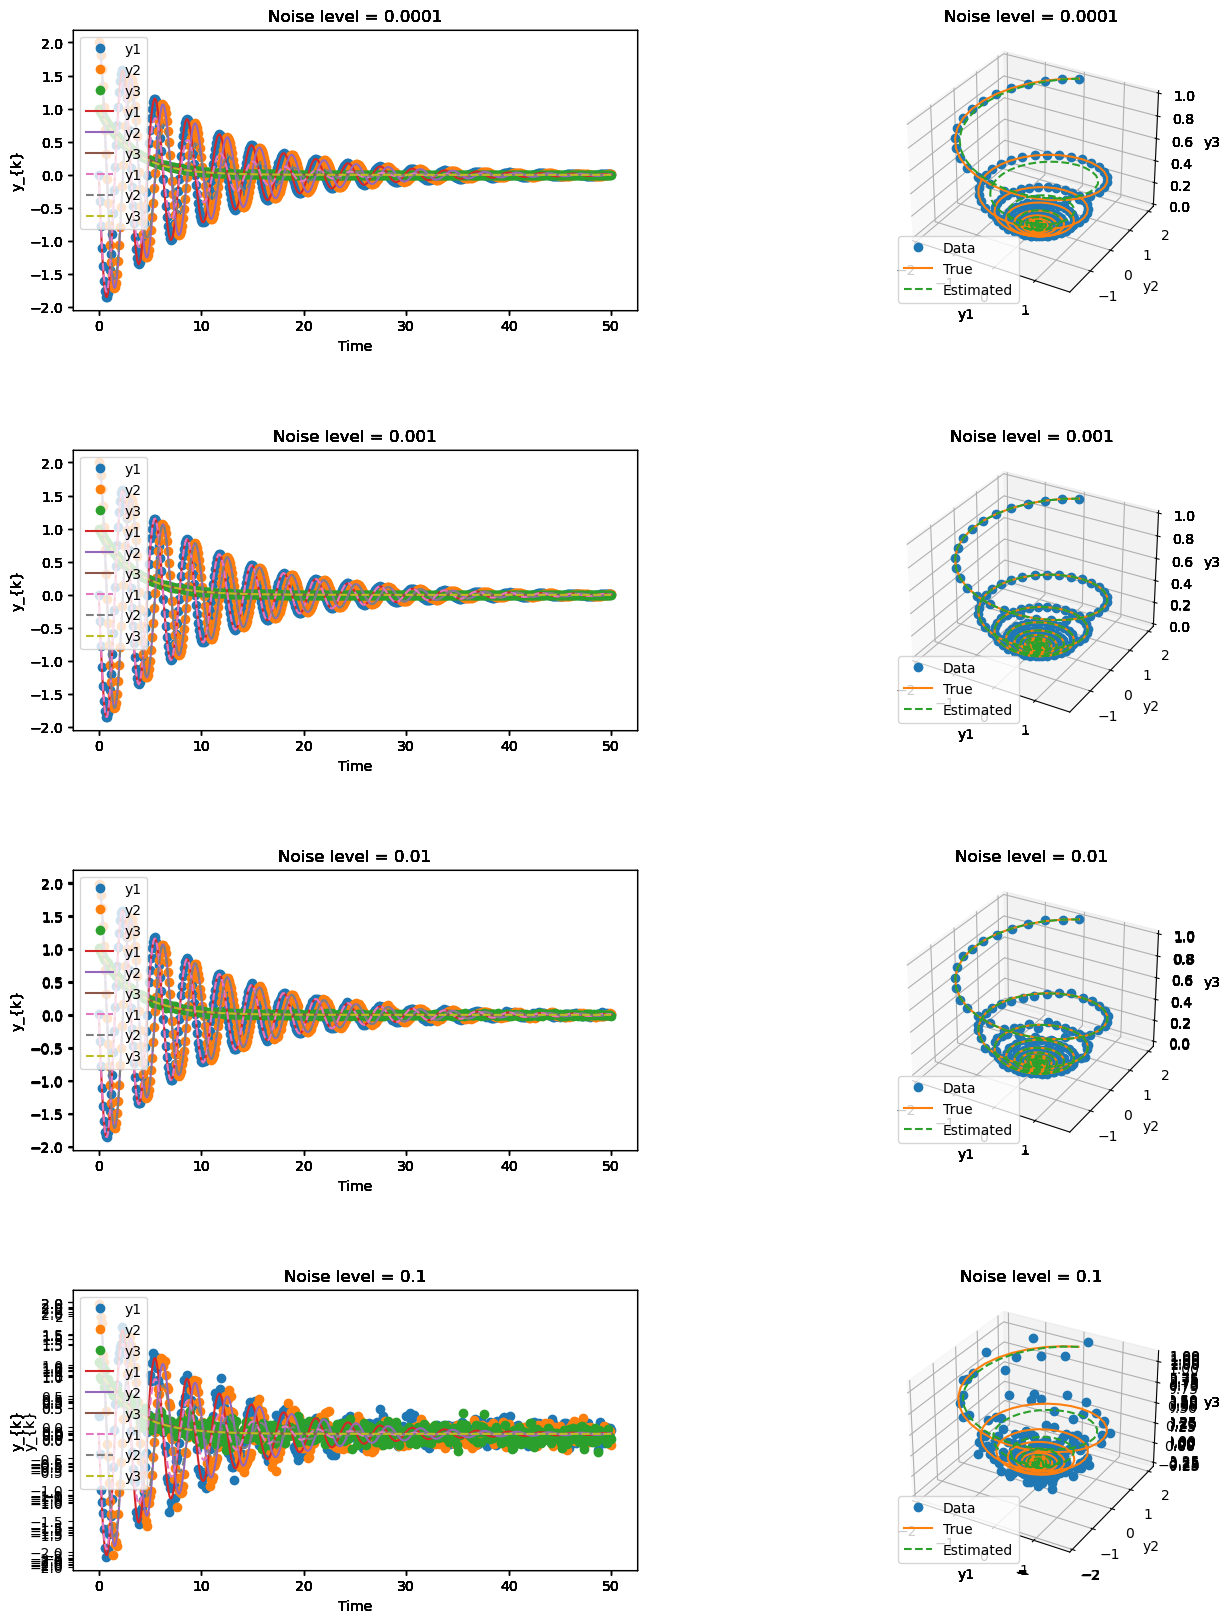

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt


# Define the function
def f(t, y, a, b, c, d, e):
    y1, y2, y3 = y
    return np.array([a * y1 + b * y2, c * y1 + d * y2, e * y3])


# Define the objective function
def objective(x, t, y_data):
    y0 = [0.0, 2.0, 1.0]  # initial conditions
    sol = solve_ivp(lambda t, y: f(t, y, x[0], x[1], x[2], x[3], x[4]), [t[0], t[-1]], y0, t_eval=t)
    y_pred = sol.y
    return np.sum((y_data - y_pred) ** 2)


# Define parameters
a = -0.1
b = -2.0
c = 2.0
d = -0.1
e = -0.3

t0 = 0.0
tmax = 50.0
y0 = np.array([0, 2, 1])

# Generate noisy data for different noise levels
t = np.linspace(t0, tmax, 500)

fig = plt.figure(figsize=(16, 20))
gs = fig.add_gridspec(nrows=4, ncols=2, height_ratios=[1, 1, 1, 1], hspace=0.5)

noises = [0.0001, 0.001, 0.01, 0.1]

num_iterations = 10
avg_mse = np.zeros(num_iterations)
avg_rmse = np.zeros(num_iterations)

for i in range(num_iterations):
    print(f"Iteration: {i+1}")
    mse_values = []
    rmse_values = []

    for j, noise in enumerate(noises):
        print(f"Noise: {noise}")
        y_true = solve_ivp(lambda t, y: f(t, y, a, b, c, d, e), [t0, tmax], y0, t_eval=t).y
        y_data = y_true + noise * np.random.randn(*y_true.shape)

        # Estimate the parameters using the trust region method
        x0 = [-0.075, -1.85, 1.85, -0.088, -0.285]  # initial guess for a, b, c, d, e
        res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr',
                       bounds=[(-1, None), (-10, None), (-10, None), (-1, None), (-1, None)])
        a_opt, b_opt, c_opt, d_opt, e_opt = res.x
        print(f"Optimized parameters: a={a_opt:.4f}, b={b_opt:.4f}, c={c_opt:.4f}, d={d_opt:.4f}, e={e_opt:.4f}")
        print(f"True parameters: a={a:.4f}, b={b:.4f}, c={c:.4f}, d={d:.4f}, e={e:.4f}")

        # Solve the differential equation using the optimized parameters
        y0 = np.array([0.0, 2.0, 1.0])  # initial conditions
        sol = solve_ivp(lambda t, y: f(t, y, a_opt, b_opt, c_opt, d_opt, e_opt), [t0, tmax], y0, t_eval=t)

        # Compute the MSE and RMSE
        mse = np.mean((y_data - sol.y)**2)
        rmse = np.sqrt(mse)
        mse_values.append(mse)
        rmse_values.append(rmse)
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")

        # Plot the trajectory in one column
        ax1 = fig.add_subplot(gs[j, 0])
        ax1.plot(sol.t, y_data[0], 'o', label='y1')
        ax1.plot(sol.t, y_data[1], 'o', label='y2')
        ax1.plot(sol.t, y_data[2], 'o', label='y3')
        ax1.plot(sol.t, y_true[0], '-', label='y1')
        ax1.plot(sol.t, y_true[1], '-', label='y2')
        ax1.plot(sol.t, y_true[2], '-', label='y3')
        ax1.plot(sol.t, sol.y[0], '--', label='y1')
        ax1.plot(sol.t, sol.y[1], '--', label='y2')
        ax1.plot(sol.t, sol.y[2], '--', label='y3')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('y_{k}')
        ax1.set_title(f"Noise level = {noise}")
        ax1.legend()

        # Plot the 3D trajectory in the other column
        ax2 = fig.add_subplot(gs[j, 1], projection='3d')
        ax2.plot3D(y_data[0], y_data[1], y_data[2], 'o', label='Data')
        ax2.plot3D(y_true[0], y_true[1], y_true[2], '-', label='True')
        ax2.plot3D(sol.y[0], sol.y[1], sol.y[2],'--', label='Estimated')
        ax2.set_xlabel('y1')
        ax2.set_ylabel('y2')
        ax2.set_zlabel('y3')
        ax2.set_title(f"Noise level = {noise}")
        ax2.legend()

    avg_mse[i] = np.mean(mse_values)
    avg_rmse[i] = np.mean(rmse_values)

print(f"Average MSE: {np.mean(avg_mse):.4f}")
print(f"Average RMSE: {np.mean(avg_rmse):.4f}")

plt.tight_layout()
plt.show()

Iteration: 1
Noise: 0.0001
Optimized parameters: a=-0.1437, b=-1.9737, c=1.9915, d=-0.1607, e=-0.3144
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0105
RMSE: 0.1024
Noise: 0.001
Optimized parameters: a=-0.1000, b=-2.0002, c=1.9998, d=-0.1000, e=-0.2998
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0000
RMSE: 0.0010
Noise: 0.01
Optimized parameters: a=-0.0997, b=-1.9987, c=2.0017, d=-0.1001, e=-0.3012
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0001
RMSE: 0.0101
Noise: 0.1
Optimized parameters: a=-0.1083, b=-1.9998, c=1.9986, d=-0.0918, e=-0.2856
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0095
RMSE: 0.0974
Iteration: 2
Noise: 0.0001
Optimized parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0000
RMSE: 0.0001
Noise: 0.001
Optimized parameters: a=-0.1437, b=-1.9737, c=1

/tmp/ipykernel_141744/3484784978.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


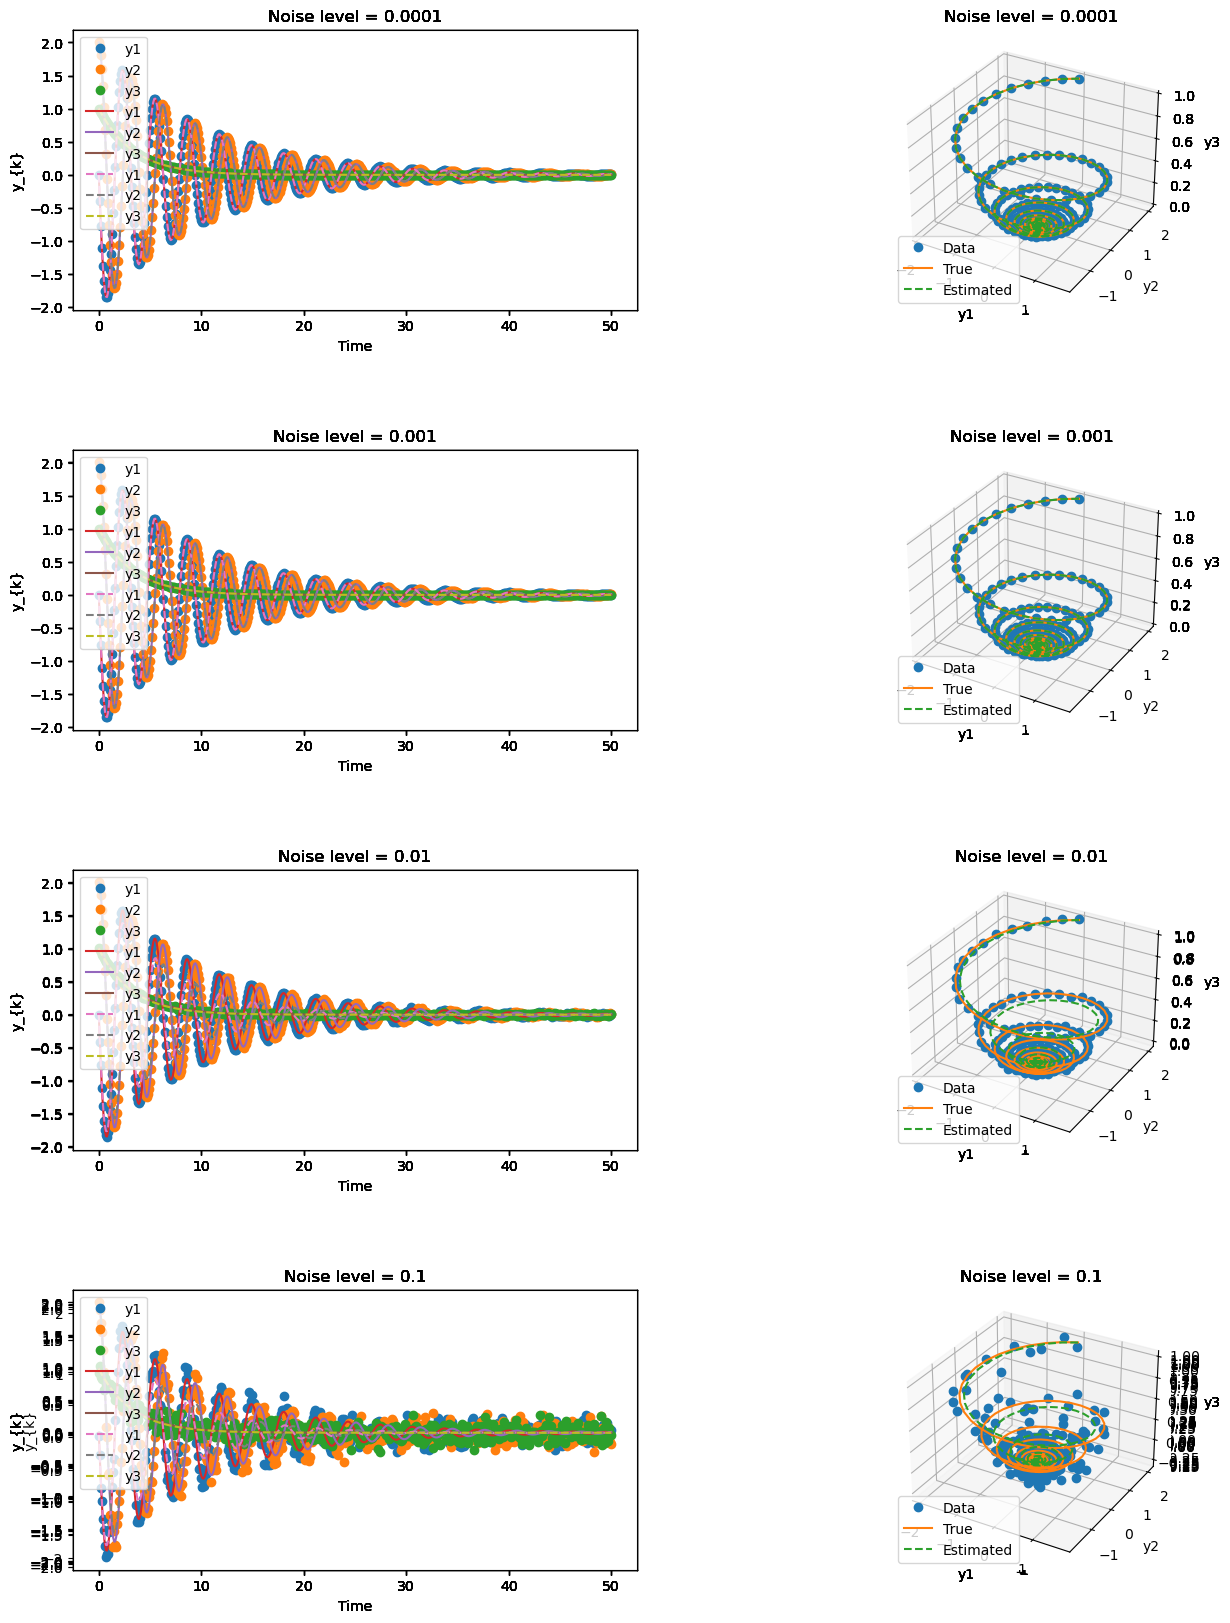

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt


# Define the function
def f(t, y, a, b, c, d, e):
    y1, y2, y3 = y
    return np.array([a * y1 + b * y2, c * y1 + d * y2, e * y3])


# Define the objective function
def objective(x, t, y_data):
    y0 = [0.0, 2.0, 1.0]  # initial conditions
    sol = solve_ivp(lambda t, y: f(t, y, x[0], x[1], x[2], x[3], x[4]), [t[0], t[-1]], y0, t_eval=t)
    y_pred = sol.y
    return np.sum((y_data - y_pred) ** 2)


# Define parameters
a = -0.1
b = -2.0
c = 2.0
d = -0.1
e = -0.3

t0 = 0.0
tmax = 50.0
y0 = np.array([0, 2, 1])

# Generate noisy data for different noise levels
t = np.linspace(t0, tmax, 500)

fig = plt.figure(figsize=(16, 20))
gs = fig.add_gridspec(nrows=4, ncols=2, height_ratios=[1, 1, 1, 1], hspace=0.5)

noises = [0.0001, 0.001, 0.01, 0.1]

num_iterations = 10
avg_mse = np.zeros(num_iterations)
avg_rmse = np.zeros(num_iterations)
avg_a_opt = np.zeros(num_iterations)
avg_b_opt = np.zeros(num_iterations)
avg_c_opt = np.zeros(num_iterations)
avg_d_opt = np.zeros(num_iterations)
avg_e_opt = np.zeros(num_iterations)

for i in range(num_iterations):
    print(f"Iteration: {i+1}")
    mse_values = []
    rmse_values = []

    for j, noise in enumerate(noises):
        print(f"Noise: {noise}")
        y_true = solve_ivp(lambda t, y: f(t, y, a, b, c, d, e), [t0, tmax], y0, t_eval=t).y
        y_data = y_true + noise * np.random.randn(*y_true.shape)

        # Estimate the parameters using the trust region method
        x0 = [-0.075, -1.85, 1.85, -0.088, -0.285]  # initial guess for a, b, c, d, e
        res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr',
                       bounds=[(-1, None), (-10, None), (-10, None), (-1, None), (-1, None)])
        a_opt, b_opt, c_opt, d_opt, e_opt = res.x
        print(f"Optimized parameters: a={a_opt:.4f}, b={b_opt:.4f}, c={c_opt:.4f}, d={d_opt:.4f}, e={e_opt:.4f}")
        print(f"True parameters: a={a:.4f}, b={b:.4f}, c={c:.4f}, d={d:.4f}, e={e:.4f}")

        # Solve the differential equation using the optimized parameters
        y0 = np.array([0.0, 2.0, 1.0])  # initial conditions
        sol = solve_ivp(lambda t, y: f(t, y, a_opt, b_opt, c_opt, d_opt, e_opt), [t0, tmax], y0, t_eval=t)

        # Compute the MSE and RMSE
        mse = np.mean((y_data - sol.y)**2)
        rmse = np.sqrt(mse)
        mse_values.append(mse)
        rmse_values.append(rmse)
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")

        # Plot the trajectory in one column
        ax1 = fig.add_subplot(gs[j, 0])
        ax1.plot(sol.t, y_data[0], 'o', label='y1')
        ax1.plot(sol.t, y_data[1], 'o', label='y2')
        ax1.plot(sol.t, y_data[2], 'o', label='y3')
        ax1.plot(sol.t, y_true[0], '-', label='y1')
        ax1.plot(sol.t, y_true[1], '-', label='y2')
        ax1.plot(sol.t, y_true[2], '-', label='y3')
        ax1.plot(sol.t, sol.y[0], '--', label='y1')
        ax1.plot(sol.t, sol.y[1], '--', label='y2')
        ax1.plot(sol.t, sol.y[2], '--', label='y3')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('y_{k}')
        ax1.set_title(f"Noise level = {noise}")
        ax1.legend()

        # Plot the 3D trajectory in the other column
        ax2 = fig.add_subplot(gs[j, 1], projection='3d')
        ax2.plot3D(y_data[0], y_data[1], y_data[2], 'o', label='Data')
        ax2.plot3D(y_true[0], y_true[1], y_true[2], '-', label='True')
        ax2.plot3D(sol.y[0], sol.y[1], sol.y[2],'--', label='Estimated')
        ax2.set_xlabel('y1')
        ax2.set_ylabel('y2')
        ax2.set_zlabel('y3')
        ax2.set_title(f"Noise level = {noise}")
        ax2.legend()

        avg_a_opt[i] += a_opt
        avg_b_opt[i] += b_opt
        avg_c_opt[i] += c_opt
        avg_d_opt[i] += d_opt
        avg_e_opt[i] += e_opt

    avg_a_opt[i] /= len(noises)
    avg_b_opt[i] /= len(noises)
    avg_c_opt[i] /= len(noises)
    avg_d_opt[i] /= len(noises)
    avg_e_opt[i] /= len(noises)

    avg_mse[i] = np.mean(mse_values)
    avg_rmse[i] = np.mean(rmse_values)

print(f"Average optimized parameters: a={np.mean(avg_a_opt):.4f}, b={np.mean(avg_b_opt):.4f}, c={np.mean(avg_c_opt):.4f}, d={np.mean(avg_d_opt):.4f}, e={np.mean(avg_e_opt):.4f}")
print(f"Average MSE: {np.mean(avg_mse):.4f}")
print(f"Average RMSE: {np.mean(avg_rmse):.4f}")

plt.tight_layout()
plt.show()


## Effect of colored noise (pink noise)

Iteration: 1
Noise: 0.0001


/tmp/ipykernel_141744/2222840442.py:57: RuntimeWarning: divide by zero encountered in true_divide
  power_spectrum = np.sqrt(1 / np.abs(freq))


Optimized parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0000
RMSE: 0.0001
Noise: 0.001
Optimized parameters: a=-0.1438, b=-1.9738, c=1.9916, d=-0.1607, e=-0.3145
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0105
RMSE: 0.1024
Noise: 0.01
Optimized parameters: a=-0.1440, b=-1.9739, c=1.9918, d=-0.1610, e=-0.3151
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0107
RMSE: 0.1036
Noise: 0.1
Optimized parameters: a=-0.1059, b=-1.9444, c=2.0491, d=-0.0931, e=-0.3687
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0145
RMSE: 0.1204
Iteration: 2
Noise: 0.0001
Optimized parameters: a=-0.0999, b=-2.0000, c=2.0000, d=-0.1001, e=-0.3001
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0000
RMSE: 0.0001
Noise: 0.001
Optimized parameters: a=-0.1439, b=-1.9738, c=1.9917, d=-0.1608, e=-0.3140

/tmp/ipykernel_141744/2222840442.py:106: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


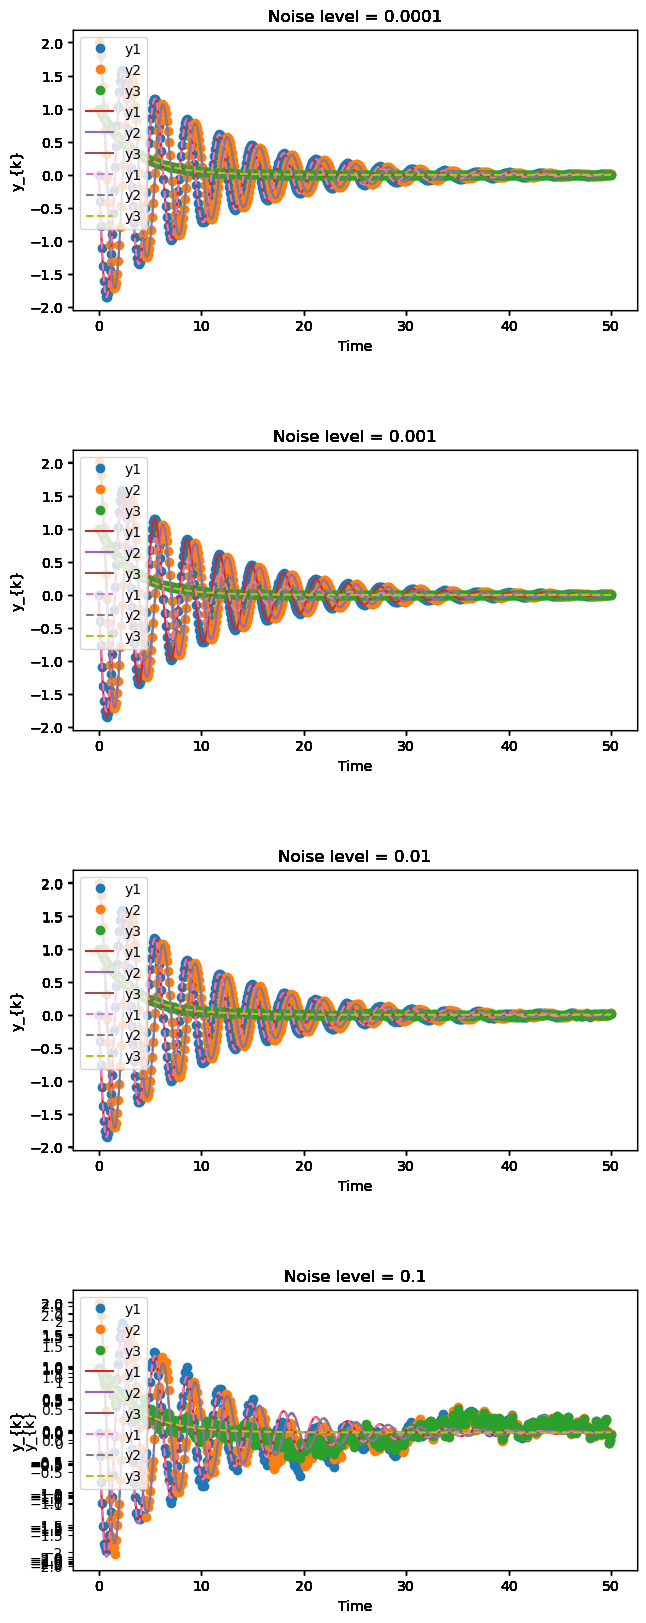

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt


# Define the function
def f(t, y, a, b, c, d, e):
    y1, y2, y3 = y
    return np.array([a * y1 + b * y2, c * y1 + d * y2, e * y3])


# Define the objective function
def objective(x, t, y_data):
    y0 = [0.0, 2.0, 1.0]  # initial conditions
    sol = solve_ivp(lambda t, y: f(t, y, x[0], x[1], x[2], x[3], x[4]), [t[0], t[-1]], y0, t_eval=t)
    y_pred = sol.y
    return np.sum((y_data - y_pred) ** 2)


# Define parameters
a = -0.1
b = -2.0
c = 2.0
d = -0.1
e = -0.3

t0 = 0.0
tmax = 50.0
y0 = np.array([0, 2, 1])

# Generate noisy data for different noise levels
t = np.linspace(t0, tmax, 500)

fig = plt.figure(figsize=(16, 20))
gs = fig.add_gridspec(nrows=4, ncols=2, height_ratios=[1, 1, 1, 1], hspace=0.5)

noises = [0.0001, 0.001, 0.01, 0.1]

num_iterations = 10
avg_mse = np.zeros(num_iterations)
avg_rmse = np.zeros(num_iterations)

for i in range(num_iterations):
    print(f"Iteration: {i+1}")
    mse_values = []
    rmse_values = []

    for j, noise in enumerate(noises):
        print(f"Noise: {noise}")
        y_true = solve_ivp(lambda t, y: f(t, y, a, b, c, d, e), [t0, tmax], y0, t_eval=t).y
        
        # Generate colored noise (pink noise)
        n = len(t)
        dt = t[1] - t[0]
        freq = np.fft.fftfreq(n, dt)
        power_spectrum = np.sqrt(1 / np.abs(freq))
        power_spectrum[0] = 0
        colored_noise = np.fft.ifft(np.fft.fft(np.random.normal(0, 1, n)) * power_spectrum).real

        desired_length = y_true.shape[1]  # Adjusted to match the length of the true solution
        y_data = y_true + noise * colored_noise

        # Estimate the parameters using the trust region method
        x0 = [-0.075, -1.85, 1.85, -0.088, -0.285]  # initial guess for a, b, c, d, e
        res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr',
                       bounds=[(-1, None), (-10, None), (-10, None), (-1, None), (-1, None)])
        a_opt, b_opt, c_opt, d_opt, e_opt = res.x
        print(f"Optimized parameters: a={a_opt:.4f}, b={b_opt:.4f}, c={c_opt:.4f}, d={d_opt:.4f}, e={e_opt:.4f}")
        print(f"True parameters: a={a:.4f}, b={b:.4f}, c={c:.4f}, d={d:.4f}, e={e:.4f}")

        # Solve the differential equation using the optimized parameters
        y0 = np.array([0.0, 2.0, 1.0])  # initial conditions
        sol = solve_ivp(lambda t, y: f(t, y, a_opt, b_opt, c_opt, d_opt, e_opt), [t0, tmax], y0, t_eval=t)

        # Compute the MSE and RMSE
        mse = np.mean((y_data - sol.y)**2)
        rmse = np.sqrt(mse)
        mse_values.append(mse)
        rmse_values.append(rmse)
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")

        # Plot the trajectory in one column
        ax1 = fig.add_subplot(gs[j, 0])
        ax1.plot(sol.t, y_data[0], 'o', label='y1')
        ax1.plot(sol.t, y_data[1], 'o', label='y2')
        ax1.plot(sol.t, y_data[2], 'o', label='y3')
        ax1.plot(sol.t, y_true[0], '-', label='y1')
        ax1.plot(sol.t, y_true[1], '-', label='y2')
        ax1.plot(sol.t, y_true[2], '-', label='y3')
        ax1.plot(sol.t, sol.y[0], '--', label='y1')
        ax1.plot(sol.t, sol.y[1], '--', label='y2')
        ax1.plot(sol.t, sol.y[2], '--', label='y3')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('y_{k}')
        ax1.set_title(f"Noise level = {noise}")
        ax1.legend()
        
        avg_mse[i] = np.mean(mse_values)
        avg_rmse[i] = np.mean(rmse_values)

print(f"Average MSE: {np.mean(avg_mse):.4f}")
print(f"Average RMSE: {np.mean(avg_rmse):.4f}")

plt.tight_layout()
plt.show()


Iteration: 1
Noise: 0.0001


/tmp/ipykernel_141744/3008629161.py:62: RuntimeWarning: divide by zero encountered in true_divide
  power_spectrum = np.sqrt(1 / np.abs(freq))


Optimized parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3001
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0000
RMSE: 0.0001
Noise: 0.001
Optimized parameters: a=-0.0995, b=-2.0005, c=1.9995, d=-0.1006, e=-0.2997
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0000
RMSE: 0.0012
Noise: 0.01
Optimized parameters: a=-0.1453, b=-1.9747, c=1.9931, d=-0.1621, e=-0.3115
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0107
RMSE: 0.1035
Noise: 0.1
Optimized parameters: a=-0.1223, b=-1.9908, c=2.0104, d=-0.0792, e=-0.3076
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0093
RMSE: 0.0962
Iteration: 2
Noise: 0.0001
Optimized parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
True parameters: a=-0.1000, b=-2.0000, c=2.0000, d=-0.1000, e=-0.3000
MSE: 0.0000
RMSE: 0.0001
Noise: 0.001
Optimized parameters: a=-0.1002, b=-1.9996, c=2.0004, d=-0.0998, e=-0.3003

/tmp/ipykernel_141744/3008629161.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


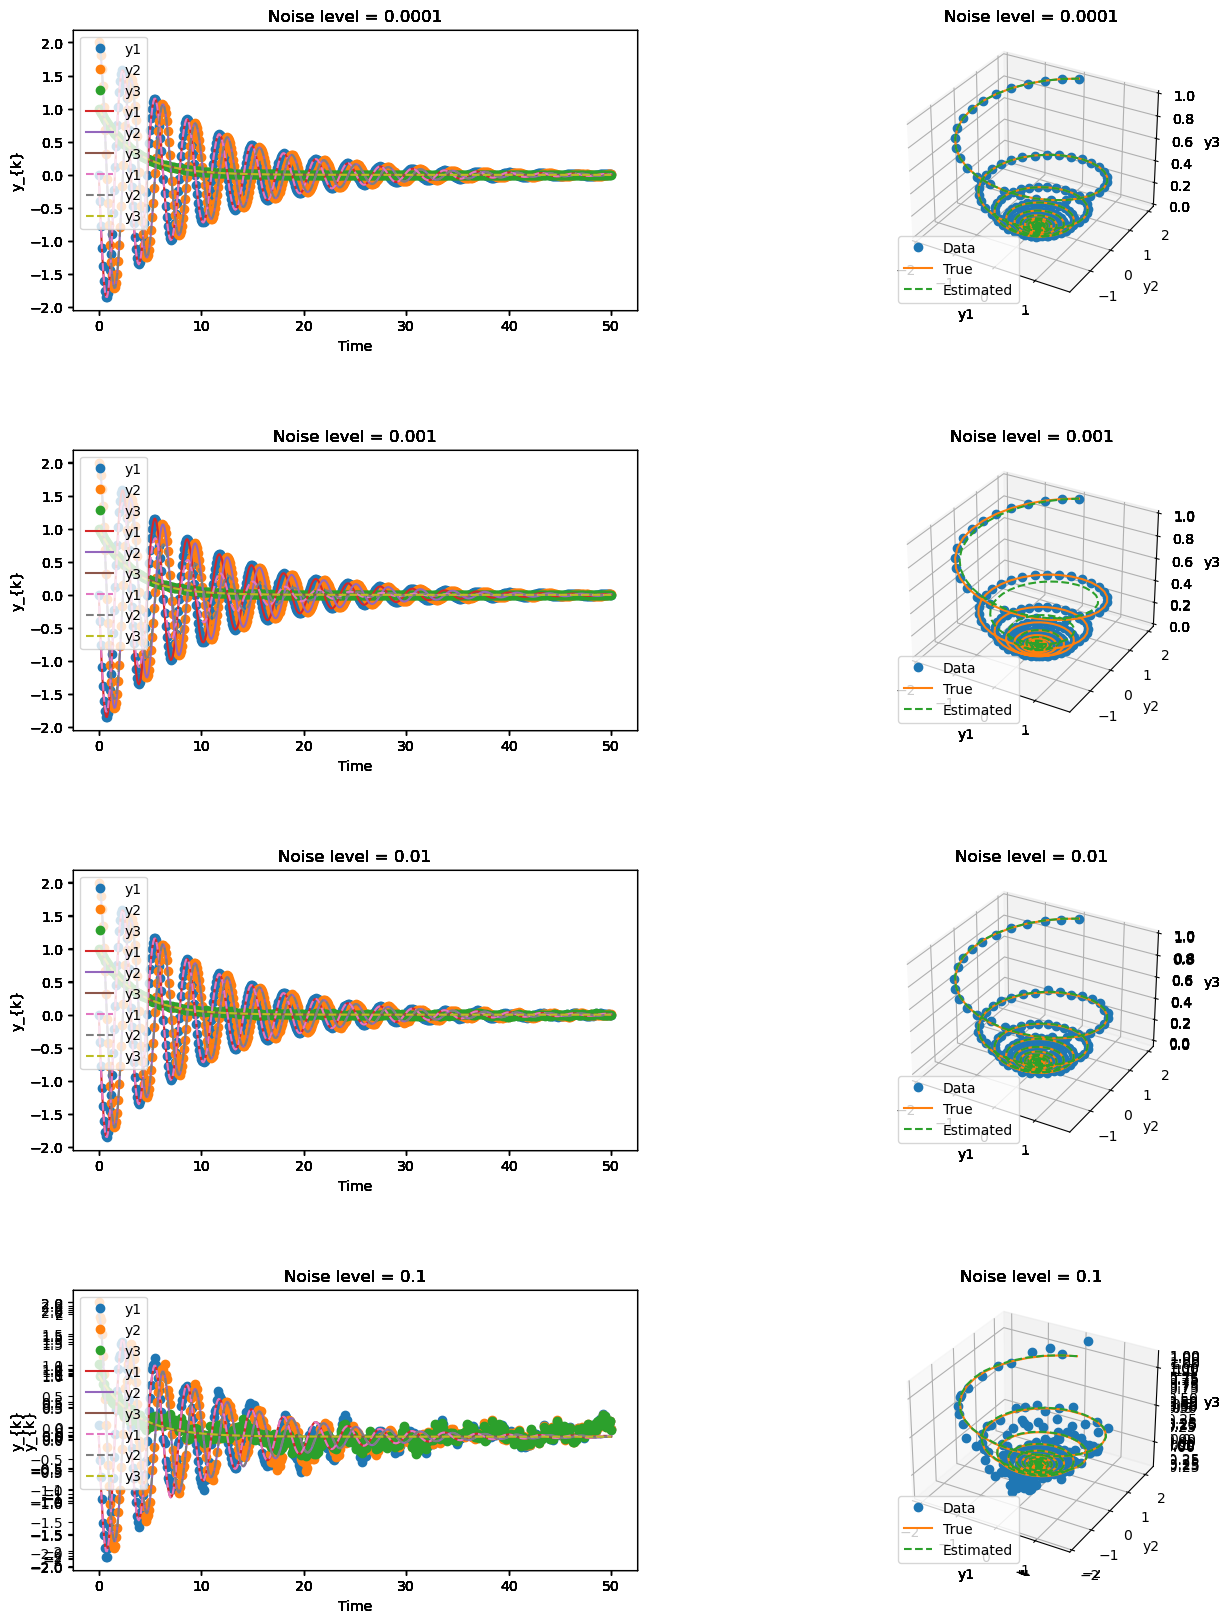

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt


# Define the function
def f(t, y, a, b, c, d, e):
    y1, y2, y3 = y
    return np.array([a * y1 + b * y2, c * y1 + d * y2, e * y3])


# Define the objective function
def objective(x, t, y_data):
    y0 = [0.0, 2.0, 1.0]  # initial conditions
    sol = solve_ivp(lambda t, y: f(t, y, x[0], x[1], x[2], x[3], x[4]), [t[0], t[-1]], y0, t_eval=t)
    y_pred = sol.y
    return np.sum((y_data - y_pred) ** 2)


# Define parameters
a = -0.1
b = -2.0
c = 2.0
d = -0.1
e = -0.3

t0 = 0.0
tmax = 50.0
y0 = np.array([0, 2, 1])

# Generate noisy data for different noise levels
t = np.linspace(t0, tmax, 500)

fig = plt.figure(figsize=(16, 20))
gs = fig.add_gridspec(nrows=4, ncols=2, height_ratios=[1, 1, 1, 1], hspace=0.5)

noises = [0.0001, 0.001, 0.01, 0.1]

num_iterations = 10
avg_mse = np.zeros(num_iterations)
avg_rmse = np.zeros(num_iterations)
avg_a_opt = np.zeros(num_iterations)
avg_b_opt = np.zeros(num_iterations)
avg_c_opt = np.zeros(num_iterations)
avg_d_opt = np.zeros(num_iterations)
avg_e_opt = np.zeros(num_iterations)

for i in range(num_iterations):
    print(f"Iteration: {i+1}")
    mse_values = []
    rmse_values = []

    for j, noise in enumerate(noises):
        print(f"Noise: {noise}")
        y_true = solve_ivp(lambda t, y: f(t, y, a, b, c, d, e), [t0, tmax], y0, t_eval=t).y
        
        # Generate colored noise (pink noise)
        n = len(t)
        dt = t[1] - t[0]
        freq = np.fft.fftfreq(n, dt)
        power_spectrum = np.sqrt(1 / np.abs(freq))
        power_spectrum[0] = 0
        colored_noise = np.fft.ifft(np.fft.fft(np.random.normal(0, 1, n)) * power_spectrum).real

        desired_length = y_true.shape[1]  # Adjusted to match the length of the true solution
        y_data = y_true + noise * colored_noise

        # Estimate the parameters using the trust region method
        x0 = [-0.075, -1.85, 1.85, -0.088, -0.285]  # initial guess for a, b, c, d, e
        res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr',
                       bounds=[(-1, None), (-10, None), (-10, None), (-1, None), (-1, None)])
        a_opt, b_opt, c_opt, d_opt, e_opt = res.x
        print(f"Optimized parameters: a={a_opt:.4f}, b={b_opt:.4f}, c={c_opt:.4f}, d={d_opt:.4f}, e={e_opt:.4f}")
        print(f"True parameters: a={a:.4f}, b={b:.4f}, c={c:.4f}, d={d:.4f}, e={e:.4f}")
        
        avg_a_opt[i] += a_opt
        avg_b_opt[i] += b_opt
        avg_c_opt[i] += c_opt
        avg_d_opt[i] += d_opt
        avg_e_opt[i] += e_opt

        # Solve the differential equation using the optimized parameters
        y0 = np.array([0.0, 2.0, 1.0])  # initial conditions
        sol = solve_ivp(lambda t, y: f(t, y, a_opt, b_opt, c_opt, d_opt, e_opt), [t0, tmax], y0, t_eval=t)

        # Compute the MSE and RMSE
        mse = np.mean((y_data - sol.y)**2)
        rmse = np.sqrt(mse)
        mse_values.append(mse)
        rmse_values.append(rmse)
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")

        # Plot the trajectory in one column
        ax1 = fig.add_subplot(gs[j, 0])
        ax1.plot(sol.t, y_data[0], 'o', label='y1')
        ax1.plot(sol.t, y_data[1], 'o', label='y2')
        ax1.plot(sol.t, y_data[2], 'o', label='y3')
        ax1.plot(sol.t, y_true[0], '-', label='y1')
        ax1.plot(sol.t, y_true[1], '-', label='y2')
        ax1.plot(sol.t, y_true[2], '-', label='y3')
        ax1.plot(sol.t, sol.y[0], '--', label='y1')
        ax1.plot(sol.t, sol.y[1], '--', label='y2')
        ax1.plot(sol.t, sol.y[2], '--', label='y3')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('y_{k}')
        ax1.set_title(f"Noise level = {noise}")
        ax1.legend()

        # Plot the 3D trajectory in the other column
        ax2 = fig.add_subplot(gs[j, 1], projection='3d')
        ax2.plot3D(y_data[0], y_data[1], y_data[2], 'o', label='Data')
        ax2.plot3D(y_true[0], y_true[1], y_true[2], '-', label='True')
        ax2.plot3D(sol.y[0], sol.y[1], sol.y[2],'--', label='Estimated')
        ax2.set_xlabel('y1')
        ax2.set_ylabel('y2')
        ax2.set_zlabel('y3')
        ax2.set_title(f"Noise level = {noise}")
        ax2.legend()

    avg_a_opt[i] /= len(noises)
    avg_b_opt[i] /= len(noises)
    avg_c_opt[i] /= len(noises)
    avg_d_opt[i] /= len(noises)
    avg_e_opt[i] /= len(noises)
    
    avg_mse[i] = np.mean(mse_values)
    avg_rmse[i] = np.mean(rmse_values)

print(f"Average MSE: {np.mean(avg_mse):.4f}")
print(f"Average RMSE: {np.mean(avg_rmse):.4f}")

plt.tight_layout()
plt.show()
